# Text classification on Movie review dataset


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('31640132-moviereviews.csv')

In [135]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [137]:
df.shape

(2000, 2)

In [138]:
# Check for any missing values in dataset

In [139]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [140]:
# Remove any reviews that are Nan

In [141]:
df = df.dropna()

In [142]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [143]:
# Check to see if any reviews are blank strings & not jus NaN.

In [144]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [145]:
df = df[~df['review'].str.isspace()] # inverse 

In [146]:
df[df['review'].apply(lambda review : review == ' ')]

,label,review


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [148]:
df.label.value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [149]:
# Bag of words

In [150]:
# using countvectorizer model to get the top 20 words(that are not english stop words)per label type

In [151]:
from sklearn.feature_extraction.text import CountVectorizer

In [152]:
count_vect = CountVectorizer(stop_words= 'english')

In [153]:
# Top 20 words used for Negative reviews.

In [154]:
sparse_matrix = count_vect.fit_transform(df[df['label']== 'neg']['review'])
freq = zip(count_vect.get_feature_names(), sparse_matrix.sum(axis = 0).tolist()[0])

# sort from Largest to smallest

print(sorted(freq, key = lambda x : -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


C:\Users\240G_up\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [155]:
# Top 20 words used for positive reviews.

In [156]:
sparse_matrix = count_vect.fit_transform(df[df['label']== 'pos']['review'])
freq = zip(count_vect.get_feature_names(), sparse_matrix.sum(axis = 0).tolist()[0])

# sort from Largest to smallest

print(sorted(freq, key = lambda x : -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [157]:
# Split the data into Features & labels

In [158]:
X = df['review']
y = df['label']

In [159]:
# Train test split

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [161]:
# Training model

# create a pipeline that will both create a TFIDF Vector out of the raw text data and fit a supervised learning model . and then fit that pipeline on the training data

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [163]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [164]:
X_train_tfidf = tfidf.transform(X_train)

In [165]:
X_test_tfidf  = tfidf.transform(X_test)

In [166]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [168]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

# Lets create a classification report and plot a confusion matrix based on the results of your pipeline

In [170]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [171]:
preds = pipe.predict(X_test)

In [173]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



C:\Users\240G_up\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


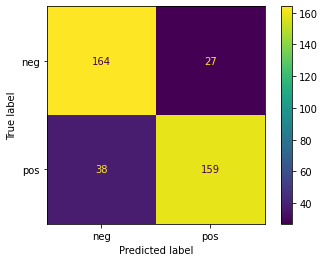

In [174]:
plot_confusion_matrix(pipe, X_test,y_test)

In [179]:
pipe.predict(['film'])

array(['neg'], dtype=object)